In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info() #this dataset includes total 33 columns in which 1 is object dtype and remains all are numeric datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#in this dataset unnamed and id not playing valuable role in the data


In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#in unnamed column have all the null values ,so we will drop this column

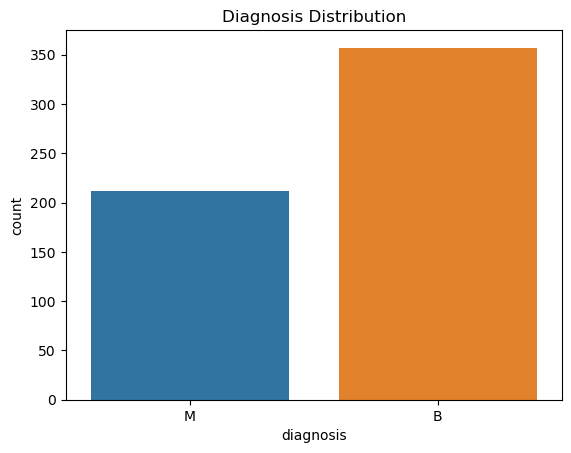

In [8]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.show()

#Malignant (M):more than 200 Indicates that the breast mass is cancerous (cancerous tumor).
#Benign(B): around 350 Indicates that the breast mass is non-cancerous

<Axes: xlabel='id', ylabel='texture_mean'>

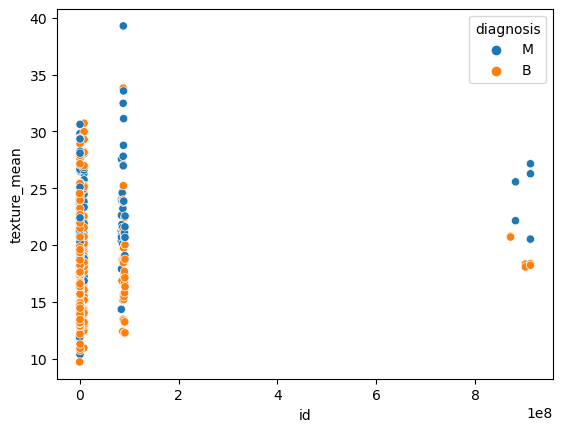

In [9]:
sns.scatterplot(data=df,y="texture_mean",x="id",hue="diagnosis")

In [12]:
#texture_mean" as one of the features and coloring the points based on the "diagnosis" 
#( "M" for malignant(cancerous and benign for non cancerous)

<Axes: xlabel='smoothness_mean', ylabel='Density'>

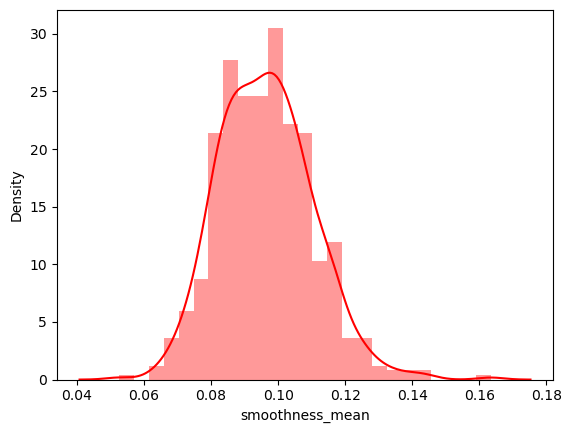

In [13]:
sns.distplot(df["smoothness_mean"],color="r")# distribution of this chart is approximately symmetrical/data is normally distributed

In [14]:
#visualizing the worst features like parameter_worst/s_worst

<Axes: xlabel='perimeter_worst', ylabel='Density'>

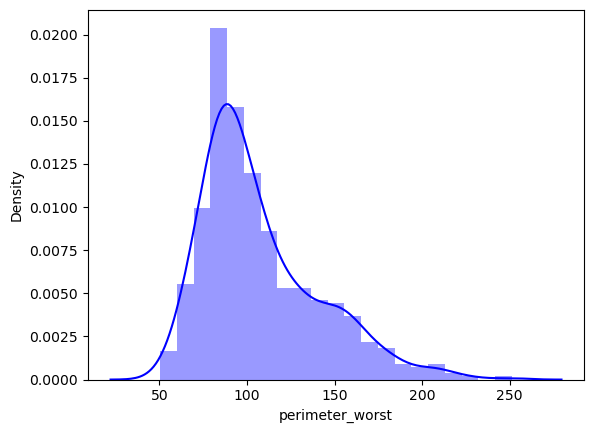

In [15]:
sns.distplot(df["perimeter_worst"],color="b")
#chart showing long tail (greater than other side) on the right side, that means data is positively skewd

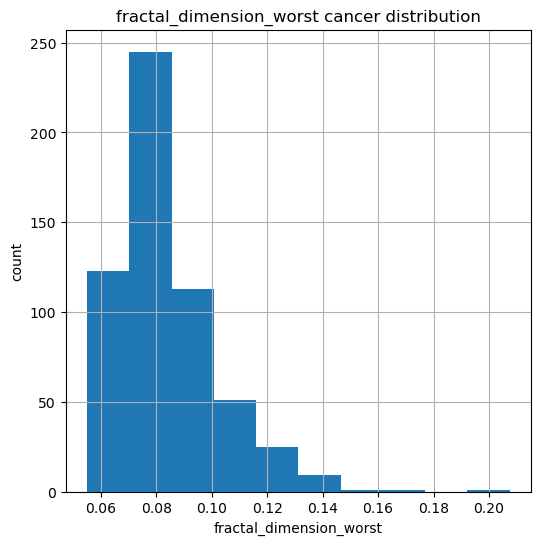

In [16]:
plt.figure(figsize=(6,6))
df["fractal_dimension_worst"].hist(bins=10)
plt.title("fractal_dimension_worst cancer distribution")
plt.xlabel("fractal_dimension_worst")
plt.ylabel("count")
plt.show()

In [17]:
#in the above fractal_dimension_worst cancer distribution chart, 0.08 fractal_dimension_worst values have high count upto 250 

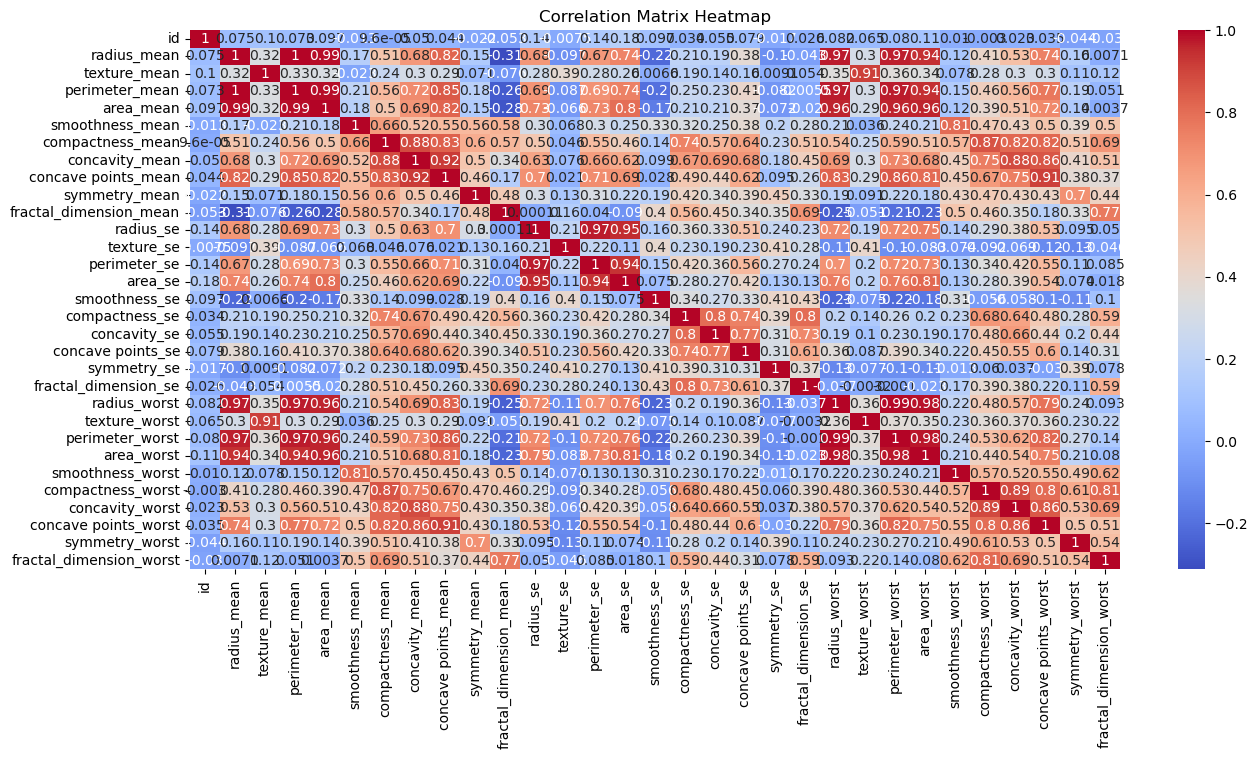

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
#Correlation matrix heatmap to identify relationships between features

In [29]:
# red colour representing this strong positive relationship(close to 1)
#blue colour representing this strong negative relationship.(close to -1)
#white or light shade representing this lack of relationship(close to 0)/ features that might be highly related to the diagnosis of breast cancer.


In [20]:
df.drop("Unnamed: 32", axis=1,inplace=True)

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
features=df.drop(['diagnosis'], axis=1)
target = df['diagnosis']


In [23]:
features.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ada_model = AdaBoostClassifier()


rf_model.fit(xtrain, ytrain)
gb_model.fit(xtrain, ytrain)
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier()

In [26]:
def evaluate_model(model, model_name):
    y_pred = model.predict(xtest)
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))

evaluate_model(rf_model, 'Random Forest')
evaluate_model(gb_model, 'Gradient Boosting')
evaluate_model(ada_model, 'AdaBoost')


Classification Report for Random Forest:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   mac

In [27]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Gradient Boosting', gb_model),
    ('AdaBoost', ada_model)], voting='hard')

ensemble.fit(xtrain, ytrain)
evaluate_model(ensemble,'Ensemble Model')
 
    
#here i used ensemble voting classifier to 
#combine several models and improve the predictive performance
#by choosing the output class based on the highest majority of voting


Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

